In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
events_data = pd.read_csv('datasets/df_concat7.csv')
events_data.head()


,Month,Area Affected,NERC Region,Event Type,Demand Loss (MW),Number of Customers Affected,Year,Date/Time Event Began,Date/Time Restoration,Event Duration (hours)
0,January,Washington,WECC,System Operations,0.0,NaN,2019,2019-01-05 13:19:00,2019-01-05 15:07:00,1.80
1,January,Washington,WECC,Severe Weather,230.0,230000.0,2019,2019-01-06 03:00:00,2019-01-09 07:00:00,4.00
2,January,California,WECC,Severe Weather,300.0,90382.0,2019,2019-01-06 17:56:00,2019-01-06 21:52:00,3.93
3,January,Washington,WECC,Severe Weather,NaN,230000.0,2019,2019-01-06 01:00:00,2019-01-06 12:00:00,11.00
4,January,Michigan,RF,System Operations,0.0,0.0,2019,2019-01-07 20:57:00,2019-01-07 21:32:00,0.58


In [10]:
events_data.loc[~events_data['NERC Region']\
                .str.contains('/'),'NERC Region']\
                .unique()

array(['WECC', 'RF', 'SPP RE', 'SERC', 'NPCC', 'TRE', 'MRO', 'FRCC',
       'RE '], dtype=object)

### How many electric disturbances occurred in the U.S. from 2019 to 2022?

In [24]:
print(f'{events_data.shape[0]} events were recorded.')

1438 events were recorded.


### What is the number of events per year?

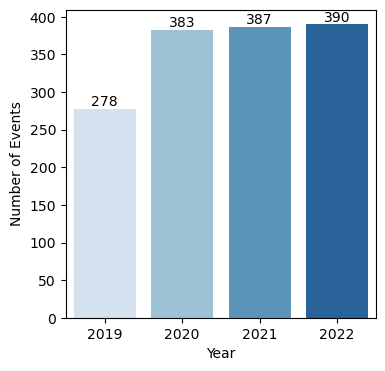

In [16]:
# list with number of events per year
number_events_year = []

# range of years
years = range(2019, 2023, 1)

# filtering the number of events by year
for i in years:
    result = events_data.query('Year == @i')
    number_events_year.append(result.shape[0])

# dataframe with number of events and year variables
df = pd.DataFrame({'Number of Events':number_events_year,'Year':years})

# plotting 
fig = plt.subplots(figsize=(4,4))
ax = sns.barplot(data = df, x='Year', y='Number of Events', palette='Blues')
ax.bar_label(ax.containers[0])# this line shows the values
plt.show()

### What is the number of electric disturbances by month each year?

In [3]:
#each_year = events_data.groupby(['Year']).count()
events_each_month = events_data.groupby(['Year','Month'], sort=False, as_index=False)['Area Affected'].count()
events_each_month.rename(columns={'Area Affected':'Number of Events'}, inplace=True)

events_each_month.head()

,Year,Month,Number of Events
0,2019,January,26
1,2019,February,25
2,2019,March,11
3,2019,April,27
4,2019,May,15


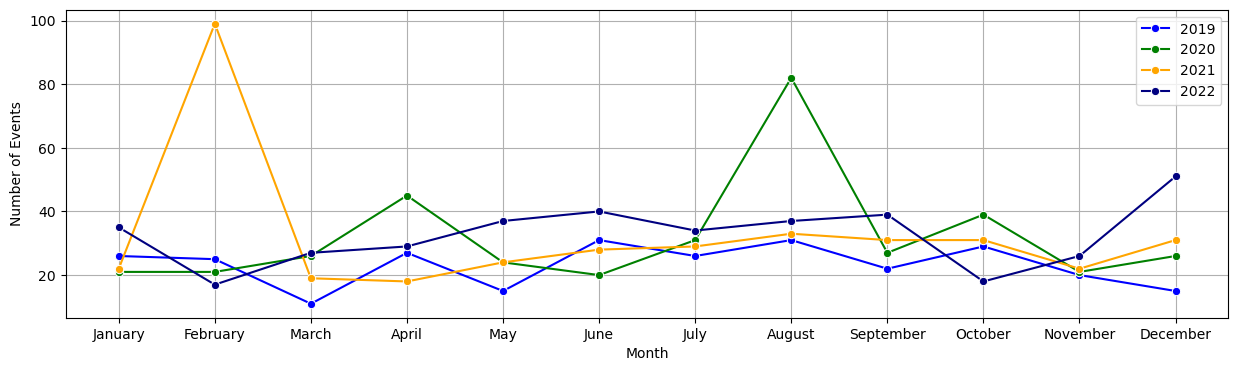

In [66]:
df_2019 = events_each_month.loc[events_each_month.loc[:,'Year'] == 2019,['Number of Events','Month']]
df_2020 = events_each_month.loc[events_each_month.loc[:,'Year'] == 2020,['Number of Events','Month']]
df_2021 = events_each_month.loc[events_each_month.loc[:,'Year'] == 2021,['Number of Events','Month']]
df_2022 = events_each_month.loc[events_each_month.loc[:,'Year'] == 2022,['Number of Events','Month']]

fig = plt.subplots(figsize=(15,4))
sns.lineplot(data=df_2019, x='Month', y= 'Number of Events', marker='o', color='blue', label='2019')
sns.lineplot(data=df_2020, x='Month', y= 'Number of Events', marker='o', color='green', label='2020')
sns.lineplot(data=df_2021, x='Month', y= 'Number of Events', marker='o', color='orange', label='2021')
sns.lineplot(data=df_2022, x='Month', y= 'Number of Events', marker='o', color='navy', label='2022')

plt.grid(True)
plt.show()


In [4]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
events_each_month_pivoted = events_each_month.pivot(index='Month',columns=['Year'],values='Number of Events')
events_each_month_pivoted = events_each_month_pivoted.reindex(index=months)
events_each_month_pivoted.head()

Year,2019,2020,2021,2022
Month,,,,
January,26,21,22,35
February,25,21,99,17
March,11,26,19,27
April,27,45,18,29
May,15,24,24,37


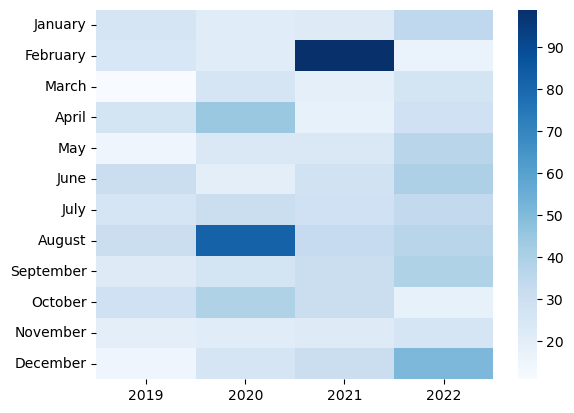

In [5]:
ax2 = sns.heatmap(events_each_month_pivoted, cmap='Blues')
ax2.set(xlabel="", ylabel="")
plt.show()

In [ ]:
# https://en.wikipedia.org/wiki/2021_Texas_power_crisis
# https://www.politico.com/states/california/story/2020/08/18/california-has-first-rolling-blackouts-in-19-years-and-everyone-faces-blame-1309757

### What is the average number of disturbances by season?

In [47]:
#Spring - March to May.
#Summer - June to August.
#Autumn - September to November.
#Winter - December to February.
years = [2019,2020,2021,2022]


num_events_2019 = [0]*len(years)
num_events_2020 = [0]*len(years)
num_events_2021 = [0]*len(years)
num_events_2022 = [0]*len(years)

events_season = pd.DataFrame({'Season':['Spring','Summer','Autumn','Winter'],\
                              'Events_2019':num_events_2019,\
                              'Events_2020':num_events_2020,\
                              'Events_2021':num_events_2021,\
                              'Events_2022':num_events_2022})
spring = []

#year_season = ['Events_2019','Events_2020','Events_2021','Events_2022']

for i in range(len(years)):
    
    events_season.iloc[0,i+1] = events_data.loc[(events_data.loc[:,'Month']=='March') \
                                              | (events_data.loc[:,'Month']=='April') \
                                                | (events_data.loc[:,'Month']=='May')\
                                                 & (events_data.loc[:,'Year']== years[i])].shape[0]

    events_season.iloc[1,i+1] = events_data.loc[(events_data.loc[:,'Month']=='June') \
                                               | (events_data.loc[:,'Month']=='July') \
                                               | (events_data.loc[:,'Month']=='August')\
                                                & (events_data.loc[:,'Year']== years[i])].shape[0]
    
    events_season.iloc[2,i+1] = events_data.loc[(events_data.loc[:,'Month']=='September') \
                                              | (events_data.loc[:,'Month']=='October') \
                                              | (events_data.loc[:,'Month']=='November')\
                                              & (events_data.loc[:,'Year']== years[i])].shape[0]
    
    events_season.iloc[3,i+1] = events_data.loc[(events_data.loc[:,'Month']=='December') \
                                              | (events_data.loc[:,'Month']=='January') \
                                              | (events_data.loc[:,'Month']=='February')\
                                              & (events_data.loc[:,'Year']== years[i])].shape[0]

#events = [spring,summer,autumn,winter]

#percentage = [(spring/sum(events))*100, (summer/sum(events))*100,
#              (autumn/sum(events))*100, (winter/sum(events))*100]

#events_season = pd.DataFrame({'Season':['Spring','Summer','Autumn','Winter'],'Number of Events':events,'Percentage':percentage})
#events_season['Percentage'] = round(events_season['Percentage'],2)
#events_season=events_season.sort_values('Percentage', ascending=False)
events_season['Average_Events_Season'] = events_season.iloc[:,1:].mean(axis=1)
events_season


,Season,Events_2019,Events_2020,Events_2021,Events_2022,Average_Events_Season
0,Spring,217,226,226,239,227.00
1,Summer,270,321,272,276,284.75
2,Autumn,256,257,258,262,258.25
3,Winter,252,248,326,244,267.50


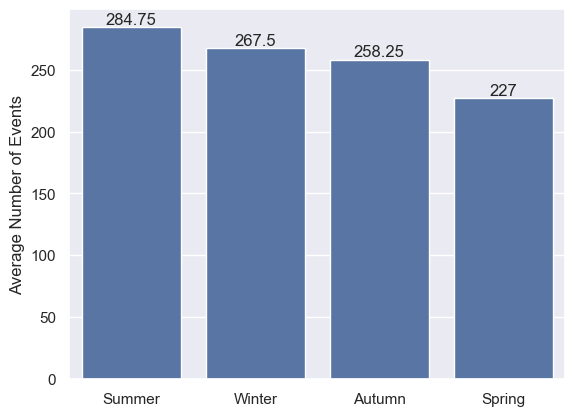

In [52]:
sns.set_theme(style='darkgrid')
ax3 = sns.barplot(data=events_season.sort_values('Average_Events_Season', ascending=False), \
                  x = 'Season', y= 'Average_Events_Season', color='b')
ax3.set(ylabel="Average Number of Events", xlabel="")
ax3.bar_label(ax3.containers[0])
plt.show()

In [ ]:
# https://realpython.com/pandas-groupby/
# https://seaborn.pydata.org/generated/seaborn.lineplot.html
# https://www.datacamp.com/tutorial/python-seaborn-line-plot-tutorial


### Which states registered more disturbances events?

In [39]:
# list with all the US states
us_states_list = ['Alabama','Alaska', 'Arizona', 'Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']

# function to search a specific state in a string 
# returns true or false
def state_search(s, search):
    return search in str(s)

# caculating the number of events in each state
list_events_state = []
for state_name in us_states_list:
    st_events_number = events_data.loc[:,'Area Affected'].apply(lambda x: state_search(x, state_name)).sum()
    list_events_state.append(st_events_number)

# dataframe with the number of disturbances by state
df_state_events = pd.DataFrame({'State':us_states_list, 'Number of events':list_events_state})

print('Top 5 States with the most electric disturbances')
df_state_events.sort_values('Number of events',ascending=False).head()

Top 5 States with the most electric disturbances


,State,Number of events
42,Texas,214
4,California,198
46,Washington,82
17,Louisiana,58
21,Michigan,58


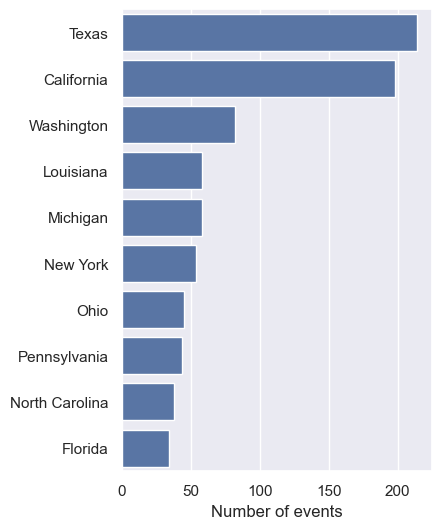

In [40]:
df_sorted = df_state_events.sort_values('Number of events',ascending=False).head(10)

# setting the grid style
sns.set_theme(style='darkgrid')

# setting the matplotlib fig
fig, ax = plt.subplots(figsize=(4,6))

# ploting the events of the 10 firt states
sns.barplot(data = df_sorted, x='Number of events', y='State', color='b')

ax.set(ylabel="")
plt.show()

In [ ]:
#https://www.geeksforgeeks.org/choropleth-maps-using-plotly-in-python/
#https://www.geeksforgeeks.org/how-to-make-a-choropleth-map-with-a-slider-using-plotly-in-python/

### Which period of the day experiences the most electric disturbances?

In [37]:
# list with the hour of the day
hour_day = ['00:00','01:00','02:00','03:00','04:00','05:00','06:00','07:00','08:00','09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00']

# list with the number of events per hour day
number_events_hour = [0]*24

# turning date/time event began in datetime
events_data['Date/Time Event Began'] = pd.to_datetime(events_data['Date/Time Event Began'], errors='coerce')

# accessing the 'date/time event began' column
for i in range(events_data.shape[0]):
    hour_flag = events_data.loc[i,'Date/Time Event Began'].hour
    number_events_hour[hour_flag] = number_events_hour[hour_flag] + 1

# creating a dataframe - 2 columns - 'hour of the day' and 'events number'
events_hour = pd.DataFrame({'Hour of day':hour_day,'Number of events':number_events_hour})

print('Hours of the day with most electric disturbances (top 5)')
events_hour.sort_values('Number of events', ascending=False).head()


Hours of the day with most electric disturbances (top 5)


,Hour of day,Number of events
11,11:00,84
10,10:00,83
12,12:00,78
14,14:00,77
13,13:00,77


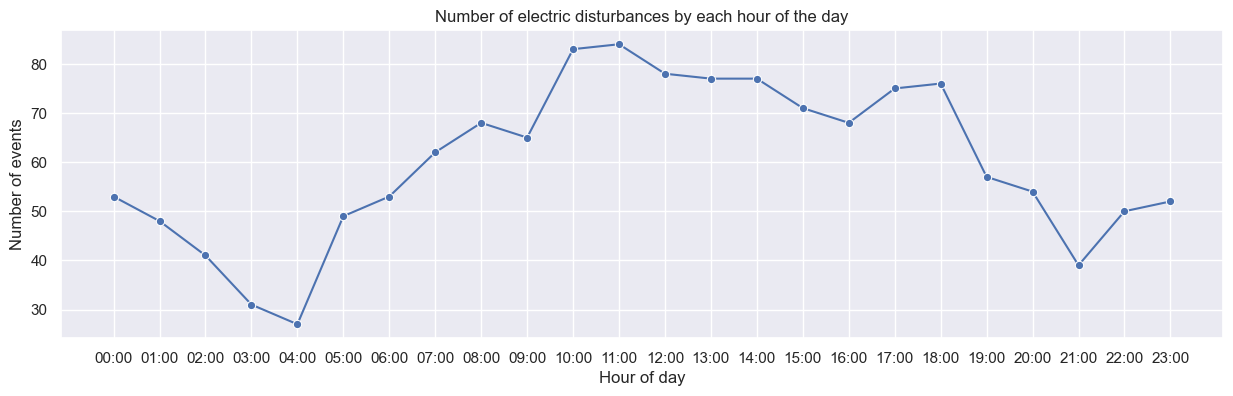

The period of the day with the highest electric disturbances occurs between 11 am and 12 am.


In [38]:
fig, ax = plt.subplots(figsize=(15,4))
sns.set_theme(style='darkgrid')
sns.lineplot(data=events_hour, x= 'Hour of day', y='Number of events', marker='o').set(title='Number of electric disturbances by each hour of the day')
plt.show()

print('The period of the day with the highest electric disturbances occurs between 11 am and 12 am.')

### What are the most common types of events?

In [4]:
# dataframe with all the types of events
total_events_type = events_data['Event Type'].unique()
total_events_type = pd.DataFrame(total_events_type)

# Funtion to search the expression '/'
def str_search(string, expres):
    return expres in str(string)

# searching the '/' in all the lines 
events_type_mask = total_events_type.applymap(lambda x: str_search(x, '/'))

# saving only the unique type of events
unique_events = total_events_type[~events_type_mask].dropna().copy()


events_type_count = [0]*len(unique_events)
events_type_name = list(unique_events.iloc[:,0])

df_events_type = pd.DataFrame({'Event type':events_type_name, 'Number of occurrences':events_type_count})

for i in range(len(events_type_name)):
    event = events_type_name[i]
    df_events_type.loc[i,'Number of occurrences'] = events_data['Event Type'].apply(lambda x: str_search(x, event)).values.sum()   

df_events_type.sort_values('Number of occurrences',ascending=False)    



,Event type,Number of occurrences
1,Severe Weather,504
0,System Operations,295
4,Vandalism,250
5,Transmission Interruption,185
2,Suspicious Activity,138
3,Actual Physical Attack,47
6,Fuel Supply Deficiency,30
12,Cyber Event,19
8,Distribution Interruption,14
7,Generation Inadequacy,7


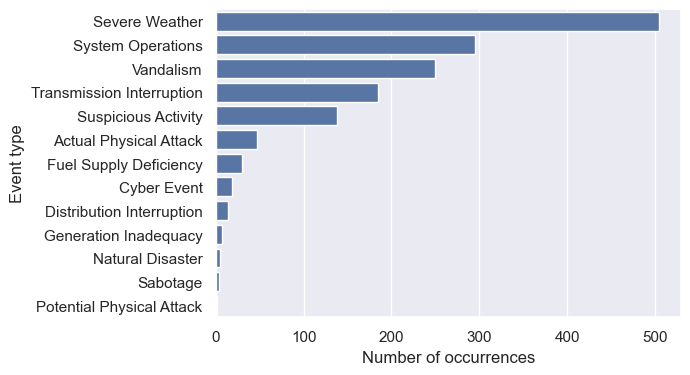

In [10]:
# ploting the results
df_sorted_et = df_events_type.sort_values('Number of occurrences',ascending=False)

sns.set_theme(style='darkgrid')

fig, ax = plt.subplots(figsize = (6,4))

sns.barplot(data=df_sorted_et, x='Number of occurrences', y='Event type', color='b')

plt.show()

### Which event types caused more Demand loss?

In [55]:
# dataframe with all the types of events
total_events_type = events_data['Event Type'].unique()
total_events_type = pd.DataFrame(total_events_type)

def str_search(search, expression):
    return expression in str(search)

events_subset = events_data[['Event Type','Demand Loss (MW)']].dropna().copy()

# searching the '/' in all the lines 
events_type_mask = total_events_type.applymap(lambda x: str_search(x, '/'))

# saving only the unique type of events
unique_events = total_events_type[~events_type_mask].dropna().copy()
events_name = list(unique_events.iloc[:,0])

total_loss_demand = events_subset['Demand Loss (MW)'].sum()
loss_demand = [0]*len(events_name)
percentage = [0]*len(events_name)

for i in range(len(unique_events)):
    mask = events_subset['Event Type'].apply(lambda x: str_search(x,events_name[i]))
    loss_demand[i] = events_subset.loc[mask,'Demand Loss (MW)'].sum() 
    percentage[i] = round((loss_demand[i]*100)/total_loss_demand,2)
    #count
#count['Demand Loss (MW)'].sum()

demand_loss_event_type = pd.DataFrame({'Event Type':events_name, 'Total Demand Loss (MW)':loss_demand, 'Percentage (%)':percentage})
demand_loss_event_type.sort_values('Total Demand Loss (MW)', ascending=False)

,Event Type,Total Demand Loss (MW),Percentage (%)
1,Severe Weather,300071.0,69.71
0,System Operations,72275.0,16.79
5,Transmission Interruption,52318.0,12.15
6,Fuel Supply Deficiency,7983.0,1.85
2,Suspicious Activity,7596.0,1.76
3,Actual Physical Attack,3874.0,0.90
4,Vandalism,3239.0,0.75
7,Generation Inadequacy,2567.0,0.60
8,Distribution Interruption,1526.0,0.35
9,Natural Disaster,654.0,0.15


##### Conclusion: Severe weather, system operations and transmission interruptions were responsible for the largest share of lost demand.

(1.0, 100.0)

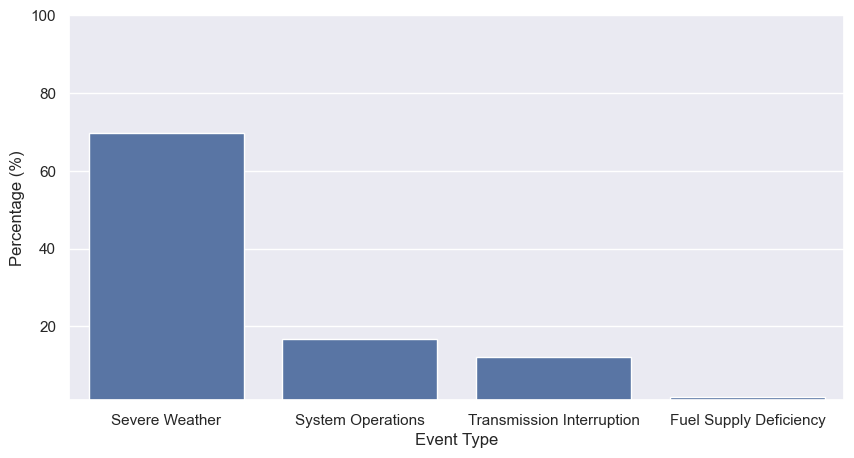

In [74]:
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=demand_loss_event_type.sort_values('Total Demand Loss (MW)', ascending=False).head(4),\
            x='Event Type', y='Percentage (%)', color='b')
ax.set_ylim(1,100)

In [ ]:
# read each event type from the column
# read the demand loss of this index 
# sum the values found and add to a variable called 'demand_loss_per_event_type'



### What is the number of customers affected by each year?

C:\Users\Administrador\AppData\Local\Temp\ipykernel_7408\1981161734.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


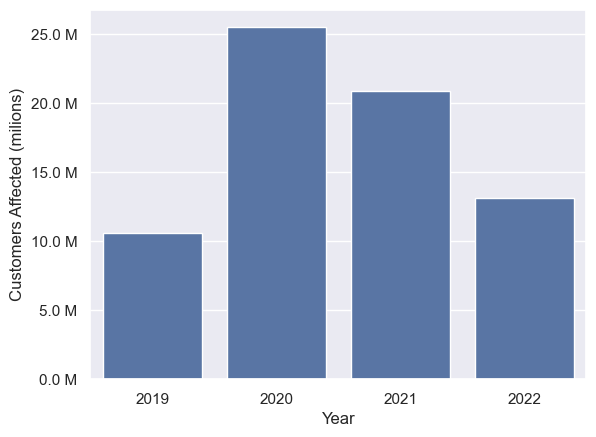

In [107]:
subset_affec_cust = events_data[['Number of Customers Affected','Year']].dropna()
subset_affec_cust = subset_affec_cust.groupby('Year', as_index=False)['Number of Customers Affected'].sum().\
                sort_values('Number of Customers Affected',ascending=False)


sns.set_theme(style='darkgrid')
ax = sns.barplot(data=subset_affec_cust, x='Year', y='Number of Customers Affected', color='b')
ax.set(ylabel='Customers Affected (milions)')
ylabels = ['{:,.1f}'.format(x) + ' M' for x in ax.get_yticks()/(1_000_000)]
ax.set_yticklabels(ylabels)
plt.show()

### What is the average time of restoration by each event type?

In [30]:
type_event_restor = events_data[['Event Type','Event Duration (hours)']].copy()

# dataframe with all the types of events
total_events_type = events_data['Event Type'].unique()
total_events_type = pd.DataFrame(total_events_type)

# Funtion to search the expression '/'
def str_search(string, expres):
    return expres in str(string)

# searching the '/' in all the lines 
events_type_mask = total_events_type.applymap(lambda x: str_search(x, '/'))

# saving only the unique type of events
unique_events = total_events_type[~events_type_mask].dropna().copy()
unique_events = list(unique_events.iloc[:,0])

avg_time_list = []

for i in range(len(unique_events)):
    pattern = unique_events[i]
    mask = type_event_restor['Event Type'].str.contains(pattern)
    avg_time = type_event_restor.loc[mask,'Event Duration (hours)'].mean()
    avg_time_list.append(round(avg_time,2))

df_type_event_restor = pd.DataFrame({'Event_Type':unique_events, 'Avg_Time_Restoration_(hours)':avg_time_list})
df_type_event_restor = df_type_event_restor.sort_values('Avg_Time_Restoration_(hours)', ascending=False)
df_type_event_restor

,Event_Type,Avg_Time_Restoration_(hours)
9,Natural Disaster,12.07
1,Severe Weather,9.23
8,Distribution Interruption,8.63
6,Fuel Supply Deficiency,6.28
12,Cyber Event,5.93
3,Actual Physical Attack,4.56
5,Transmission Interruption,4.56
7,Generation Inadequacy,3.40
0,System Operations,3.14
4,Vandalism,2.89


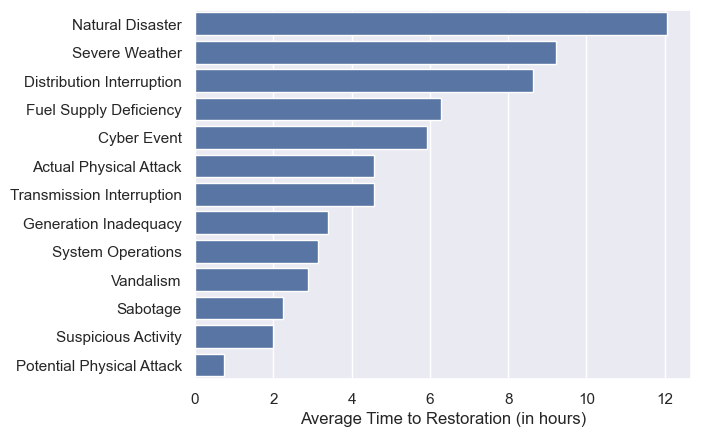

In [35]:
#plt.subplots(figsize=(6,5))
sns.set_theme(style='darkgrid')
ax = sns.barplot(data=df_type_event_restor, x='Avg_Time_Restoration_(hours)', y='Event_Type', color='b')
ax.set(ylabel='',xlabel='Average Time to Restoration (in hours)')
plt.show()
